# EDA

**Importing the Required Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Loading the Dataset**

In [ ]:
churn_df = pd.read_csv('/content/Churn_Modelling.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn_df.shape

(10000, 14)

In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
churn_df[churn_df.duplicated(subset = ['CustomerId'],keep = False)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
churn_df.columns = churn_df.columns.str.strip()

In [ ]:
churn_df.columns = churn_df.columns.str.lower()

In [ ]:
churn_df

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
churn_df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

# Data Visualization

In [ ]:
churn_df.groupby('geography')['gender'].value_counts().to_frame()

gender
geography gender        
France    Male      2753
          Female    2261
Germany   Male      1316
          Female    1193
Spain     Male      1388
          Female    1089

Text(0.5, 1.0, 'Countrywise ditribution of Gender in the Data')

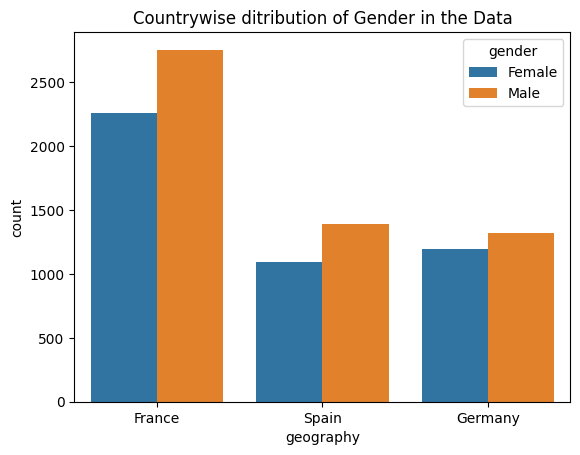

In [ ]:
sns.countplot(data = churn_df,hue = 'gender',x = 'geography')
plt.title('Countrywise ditribution of Gender in the Data')

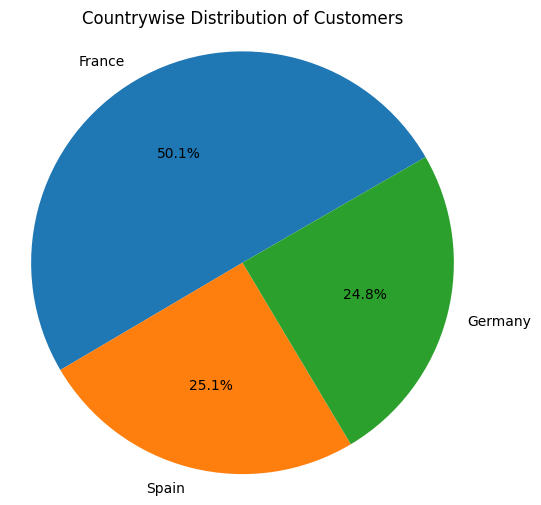

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(churn_df['geography'].value_counts(), labels=churn_df['geography'].unique(), autopct='%1.1f%%', startangle=30)
plt.title('Countrywise Distribution of Customers')
plt.axis('equal')
plt.show()


<Axes: xlabel='exited', ylabel='count'>

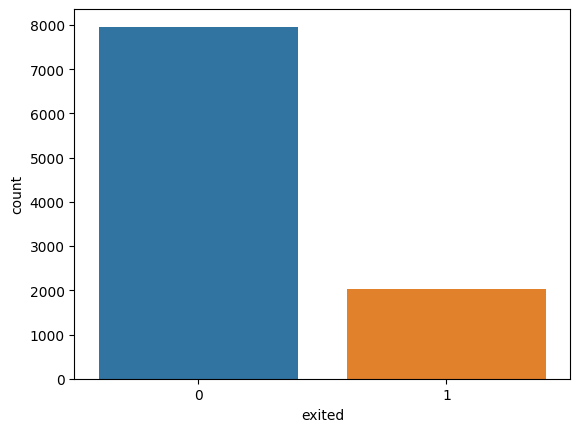

In [ ]:
sns.countplot(data = churn_df, x = 'exited')

In [ ]:
churn_df.groupby('geography')['exited'].value_counts().to_frame()

exited
geography exited        
France    0         4204
          1          810
Germany   0         1695
          1          814
Spain     0         2064
          1          413

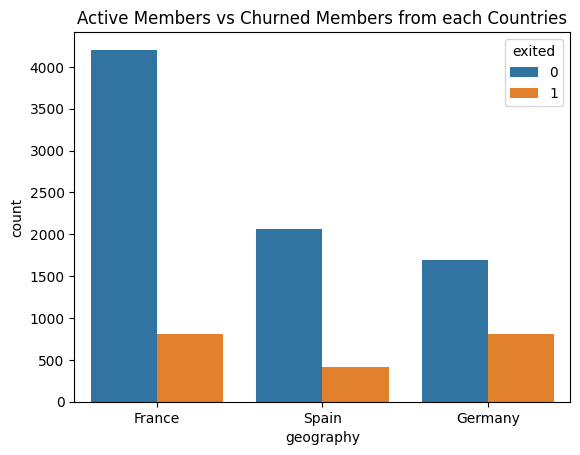

In [ ]:
sns.countplot(x='geography',hue='exited',data=churn_df)
plt.title('Active Members vs Churned Members from each Countries')
plt.show()


# Data Preprocessing

In [ ]:
churn = churn_df.drop(columns = ['rownumber','surname','gender'], axis = 1)
churn.head()

,customerid,creditscore,geography,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,15634602,619,France,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,43,2,125510.82,1,1,1,79084.10,0


**One Hot Encoding the Categorical Data i.e Geography Column**

In [ ]:
churn_encoded = pd.get_dummies(churn, columns=['geography'])
churn_encoded

,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_France,geography_Germany,geography_Spain
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0


**Separating the Data into x(Feature) and Y(Target)**

In [ ]:
X = churn_encoded.drop(columns = ['exited'], axis = 1)
Y = churn_encoded['exited']

In [ ]:
Y.value_counts().to_frame()

,exited
0,7963
1,2037


# Handling Imbalanced Data

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state = 10)
X_smt , Y_smt = smt.fit_resample(X,Y)

In [ ]:
Y_smt.value_counts()

1    7241
0    7241
Name: exited, dtype: int64

# Preparing the Training and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_smt,Y_smt, test_size = 0.2, random_state = 1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11585, 12), (2897, 12), (11585,), (2897,))

# Training and Evaluating the Model

**Logistic Regression Classifer**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy score :',accuracy_score(y_test,y_pred))
print('Classification Report :\n', classification_report(y_test,y_pred))

Accuracy score : 0.5692095270969969
Classification Report :
               precision    recall  f1-score   support

           0       0.59      0.46      0.52      1456
           1       0.55      0.68      0.61      1441

    accuracy                           0.57      2897
   macro avg       0.57      0.57      0.56      2897
weighted avg       0.57      0.57      0.56      2897



**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 10)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print('Accuracy score :',accuracy_score(y_test,y_pred))
print('Classification Report :\n', classification_report(y_test,y_pred))

Accuracy score : 0.8895409043838454
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      1456
           1       0.90      0.87      0.89      1441

    accuracy                           0.89      2897
   macro avg       0.89      0.89      0.89      2897
weighted avg       0.89      0.89      0.89      2897



**XG Boost**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
print('Accuracy score :',accuracy_score(y_test,y_pred))
print('Classification Report :\n', classification_report(y_test,y_pred))

Accuracy score : 0.8726268553676216
Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1456
           1       0.89      0.85      0.87      1441

    accuracy                           0.87      2897
   macro avg       0.87      0.87      0.87      2897
weighted avg       0.87      0.87      0.87      2897



In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=10)
svc.fit(X_train, y_train)

SVC(random_state=10)

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
print('Accuracy score :',accuracy_score(y_test,y_pred))
print('Classification Report :\n', classification_report(y_test,y_pred))

Accuracy score : 0.49741111494649637
Classification Report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1456
           1       0.50      1.00      0.66      1441

    accuracy                           0.50      2897
   macro avg       0.25      0.50      0.33      2897
weighted avg       0.25      0.50      0.33      2897



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print('Accuracy score :',accuracy_score(y_test,y_pred))
print('Classification Report :\n', classification_report(y_test,y_pred))

Accuracy score : 0.7435277873662409
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.65      0.72      1456
           1       0.70      0.84      0.76      1441

    accuracy                           0.74      2897
   macro avg       0.75      0.74      0.74      2897
weighted avg       0.75      0.74      0.74      2897



# Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training and Evaluating the Model on Scaled Data

**Logistic Regression**

In [ ]:
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test_scaled)

In [ ]:
print('Accuracy score :',accuracy_score(y_test,y_pred))
print('Classification Report :\n', classification_report(y_test,y_pred))

Accuracy score : 0.8108387987573352
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      1456
           1       0.84      0.77      0.80      1441

    accuracy                           0.81      2897
   macro avg       0.81      0.81      0.81      2897
weighted avg       0.81      0.81      0.81      2897



 **Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(random_state= 20)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=20)

In [ ]:
y_pred = lr.predict(X_test_scaled)

In [ ]:
print('Accuracy score :',accuracy_score(y_test,y_pred))
print('Classification Report :\n', classification_report(y_test,y_pred))

Accuracy score : 0.8108387987573352
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      1456
           1       0.84      0.77      0.80      1441

    accuracy                           0.81      2897
   macro avg       0.81      0.81      0.81      2897
weighted avg       0.81      0.81      0.81      2897



**XG Boost**

In [ ]:
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = lr.predict(X_test_scaled)

In [ ]:
print('Accuracy score :',accuracy_score(y_test,y_pred))
print('Classification Report :\n', classification_report(y_test,y_pred))

Accuracy score : 0.8108387987573352
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      1456
           1       0.84      0.77      0.80      1441

    accuracy                           0.81      2897
   macro avg       0.81      0.81      0.81      2897
weighted avg       0.81      0.81      0.81      2897



# The Highest accuracy i.e 89% was given by Random Forest Classifier on Unscaled Data